In [38]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('customer_information.csv')
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,cc_status,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS5 8FN,ZZ 19 48 92 T,51157818,0,74.2,1.73,B+,6.5,218.8,phD,48
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M0U 1RA,ZZ 753513 T,103328715,0,69.4,1.74,O-,0.7,43.6,primary,42
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO1 8HZ,ZZ 947196 T,69342327,0,98.6,1.88,B+,7.8,59.1,bachelor,9
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B18 8LW,ZZ 39 69 47 T,85159170,0,62.0,1.56,O+,4.6,284.2,primary,32
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ2 6BE,ZZ 30 98 91 T,11399166,0,96.3,1.81,A-,4.4,348.8,secondary,34
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM7H 0XS,ZZ 141314 T,66208707,0,43.4,1.59,A-,5.7,219.3,other,7
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L02 5WL,ZZ 97 20 76 T,108456420,0,77.5,1.55,B+,2.4,79.5,secondary,34
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR3 5ZN,ZZ 599246 T,126109351,0,59.0,1.89,A+,8.4,48.0,other,24
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR96 2TD,ZZ278789T,10754702,0,83.1,1.42,A+,1.2,148.1,secondary,17
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT5A 0AW,ZZ 131934 T,52176102,0,80.0,1.74,A+,5.2,47.0,bachelor,47


In [40]:
# Function to truncate postcode after the first numeric digit
def truncate_postcode(postcode):
    for i, char in enumerate(postcode):
        if char.isdigit():
            return postcode[:i]  # Truncate at the position of the first numeric digit
    return postcode  # Return the original postcode if no numeric digit is found

# Applying the function to create the postcode bands
data['postcode_banded'] = data['postcode'].astype(str).apply(truncate_postcode)

# Display both columns: print(data[['postcode', 'postcode_banded']])
# Replace the original column with the banded column
data['postcode'] = data['postcode_banded']

# Drop the 'postcode_banded' column if no longer needed
data.drop(columns=['postcode_banded'], inplace=True)

# Print the updated DataFrame with the banded postcode column
print(data['postcode'])

# Find the number of unique postcodes and print
num_unique_postcodes = data['postcode'].nunique()
print("Number of unique postcodes:", num_unique_postcodes)

# Counting how many postcodes are in each unique category
postcode_counts = data['postcode'].value_counts()
print(postcode_counts)

0      LS
1       M
2      SO
3       B
4      TQ
       ..
995    SA
996    TS
997     G
998    CT
999    SR
Name: postcode, Length: 1000, dtype: object
Number of unique postcodes: 124
postcode
L     70
W     68
S     65
G     58
M     56
      ..
DY     1
WF     1
IM     1
LD     1
HD     1
Name: count, Length: 124, dtype: int64


In [41]:
# Before banding, finding minimum and maximum weights to determine range
min_weight = data['weight'].min()
max_weight = data['weight'].max()

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 35.0
Maximum weight: 100.0


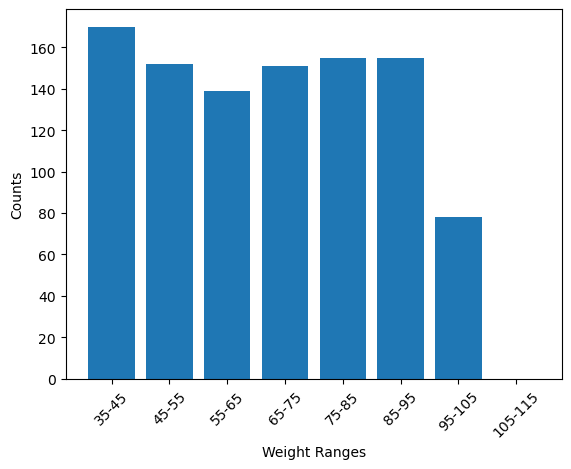

Number of unique weight ranges: 7


In [42]:
# Creating banding categories for weight with increments of 10 per category
weight_bins = [35, 45, 55, 65, 75, 85, 95, 105, 115]
weight_labels = ["35-45", "45-55", "55-65", "65-75", "75-85", "85-95", "95-105", "105-115"]  # Define labels for each bin
data["weight_ranges"] = pd.cut(data['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Obtaining counts of weight ranges
counts_weight = data["weight_ranges"].value_counts()
count_in_order_weight = [counts_weight[label] for label in weight_labels]  # Corrected variable name

# Plotting counts of weight ranges
plt.bar(weight_labels, count_in_order_weight)  # Corrected variable name
plt.xlabel("Weight Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding number of unique weight ranges
num_unique_weight_ranges = data['weight_ranges'].nunique()
print("Number of unique weight ranges:", num_unique_weight_ranges)

In [43]:
# Finding minimum and maximum heights
min_height = data['height'].min()
max_height = data['height'].max()

print(f"Minimum height: {min_height}")
print(f"Maximum height: {max_height}")

Minimum height: 1.4
Maximum height: 2.0


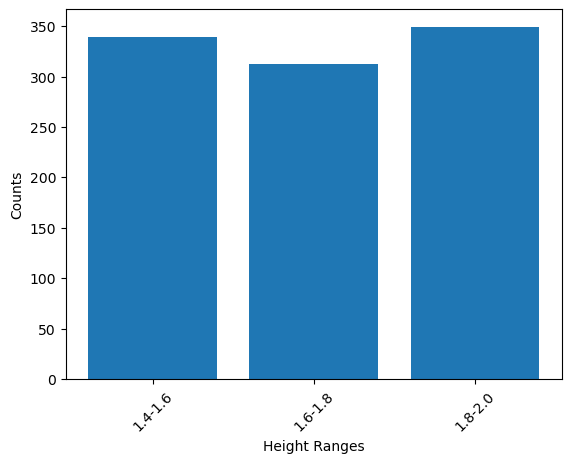

Number of unique height categories: 3


In [44]:
# Banding height into increments of 0.2
height_bins = [1.4, 1.6, 1.8, 2.1]  # Ranges for categories: 1.4-1.6, 1.6-1.8, 1.8-2.0 (adjust upper bound to include 2.0)
height_labels = ['1.4-1.6', '1.6-1.8', '1.8-2.0']  # Labels for the categories

# Banding heights into specified ranges
data['height_ranges'] = pd.cut(data['height'], bins=height_bins, labels=height_labels, right=False)

# Showing counts of height ranges
counts_height = data['height_ranges'].value_counts()
count_in_order_height = [counts_height[label] for label in height_labels]

# Plotting count of height ranges
plt.bar(height_labels, count_in_order_height)
plt.xlabel("Height Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding the number of unique height categories
num_unique_height_ranges = data['height_ranges'].nunique()
print("Number of unique height categories:", num_unique_height_ranges)

